In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup

# Part 1

# Question 1a

The 'http://eecs.qmul.ac.uk/~emmanouilb/income_table.html' consists of two elements 'head' and 'body', although 'head' has nothing side the tags, if it were filled in, it would name the tab at the top of the web browser; in this case the tab name is default to just the URL address.

Within the body there are 'h1', 'p' and 'table' tags. The 'h1' are the main header of the website, h1 is the biggest header possible, h2, h3 etc are headers but appear smaller on the page. 'p' stands for paragraph and on this page just describes the table shown below.

The table tags contain 'thead' and within those tags is a 'tr' tag, where thead is the header or top row of the table, and tr is the what will be populated on that row. In this case the top row is the column names for the data below.

'tbody' aka table-body is the last significant tag left, and this encompasses the table of data, once again within side tbody are 'tr' for each row of the table and 'td' which stands for 'table data'. Each row of the table (tr) has 'td' inside which populates the data with actual data, on the first column it is country names, where as the second and third rows are numbers.

# Question 1b

In [2]:
# load url
url = "http://eecs.qmul.ac.uk/~emmanouilb/income_table.html"
html = urlopen(url)

In [3]:
# calling BeautifulSoup
soup = BeautifulSoup(html, 'lxml')
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [4]:
# Print the first 10 table rows
# the 'tr' tag in html denotes a table row
rows = soup.find_all('tr')
print(rows[:10])

[<tr><th title="Field #1">Region</th>
<th title="Field #2">Age</th>
<th title="Field #3">Income</th>
<th title="Field #4">Online Shopper</th>
</tr>, <tr>
<td>India</td>
<td align="right">49</td>
<td align="right">86400</td>
<td>No</td>
</tr>, <tr>
<td>Brazil</td>
<td align="right">32</td>
<td align="right">57600</td>
<td>Yes</td>
</tr>, <tr>
<td>USA</td>
<td align="right">35</td>
<td align="right">64800</td>
<td>No</td>
</tr>, <tr>
<td>Brazil</td>
<td align="right">43</td>
<td align="right">73200</td>
<td>No</td>
</tr>, <tr>
<td>USA</td>
<td align="right">45</td>
<td align="right"></td>
<td>Yes</td>
</tr>, <tr>
<td>India</td>
<td align="right">40</td>
<td align="right">69600</td>
<td>Yes</td>
</tr>, <tr>
<td>Brazil</td>
<td align="right"></td>
<td align="right">62400</td>
<td>No</td>
</tr>, <tr>
<td>India</td>
<td align="right">53</td>
<td align="right">94800</td>
<td>Yes</td>
</tr>, <tr>
<td>USA</td>
<td align="right">55</td>
<td align="right">99600</td>
<td>No</td>
</tr>]


In [5]:
for row in rows:
    row_td = row.find_all('td')
    print(row_td)
type(row_td)

[]
[<td>India</td>, <td align="right">49</td>, <td align="right">86400</td>, <td>No</td>]
[<td>Brazil</td>, <td align="right">32</td>, <td align="right">57600</td>, <td>Yes</td>]
[<td>USA</td>, <td align="right">35</td>, <td align="right">64800</td>, <td>No</td>]
[<td>Brazil</td>, <td align="right">43</td>, <td align="right">73200</td>, <td>No</td>]
[<td>USA</td>, <td align="right">45</td>, <td align="right"></td>, <td>Yes</td>]
[<td>India</td>, <td align="right">40</td>, <td align="right">69600</td>, <td>Yes</td>]
[<td>Brazil</td>, <td align="right"></td>, <td align="right">62400</td>, <td>No</td>]
[<td>India</td>, <td align="right">53</td>, <td align="right">94800</td>, <td>Yes</td>]
[<td>USA</td>, <td align="right">55</td>, <td align="right">99600</td>, <td>No</td>]
[<td>India</td>, <td align="right">42</td>, <td align="right">80400</td>, <td>Yes</td>]


bs4.element.ResultSet

In [6]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[India, 42, 80400, Yes]


In [7]:
# Create an empty list where the table header will be stored
header_list = []

# Find the 'th' html tags which denote table header
col_labels = soup.find_all('th')
col_str = str(col_labels)
# extract the text without HTML tags
cleantext_header = BeautifulSoup(col_str, "lxml").get_text()  
# Add the clean table header to the list
header_list.append(cleantext_header)

print(header_list)

['[Region, Age, Income, Online Shopper]']


In [8]:
# Create an empty list where the table will be stored
table_list = []

# For every row in the table, find each cell element and add it to the list
for row in rows:
    row_td = row.find_all('td')
    row_cells = str(row_td)
    # extract the text without HTML tags
    row_cleantext = BeautifulSoup(row_cells, "lxml").get_text()
    # Add the clean table row to the list
    table_list.append(row_cleantext)  
    
print(table_list)

['[]', '[India, 49, 86400, No]', '[Brazil, 32, 57600, Yes]', '[USA, 35, 64800, No]', '[Brazil, 43, 73200, No]', '[USA, 45, , Yes]', '[India, 40, 69600, Yes]', '[Brazil, , 62400, No]', '[India, 53, 94800, Yes]', '[USA, 55, 99600, No]', '[India, 42, 80400, Yes]']


In [9]:
# show the header in a datafram
df_header = pd.DataFrame(header_list)
# cleaning the header but splitting each word on the ','
df_header2 = df_header[0].str.split(',', expand=True)
df_header2.head()


,0,1,2,3
0,[Region,Age,Income,Online Shopper]


In [10]:
# presenting the table_list as a dataframe
df_table = pd.DataFrame(table_list)
# cleaning each row using .split
df_table2 = df_table[0].str.split(',', expand=True)
df_table2

,0,1,2,3
0,[],None,None,None
1,[India,49,86400,No]
2,[Brazil,32,57600,Yes]
3,[USA,35,64800,No]
4,[Brazil,43,73200,No]
5,[USA,45,,Yes]
6,[India,40,69600,Yes]
7,[Brazil,,62400,No]
8,[India,53,94800,Yes]
9,[USA,55,99600,No]


In [11]:
# Remove uneccesary characters
df_table2[0] = df_table2[0].str.strip('[')
df_table2[1] = df_table2[1].str.strip(']')
df_table2[3] = df_table2[3].str.strip(']')

# Remove all rows with any missing values
df_table3 = df_table2.dropna(axis=0, how='any')
# full table of results 
df_table3

,0,1,2,3
1,India,49,86400,No
2,Brazil,32,57600,Yes
3,USA,35,64800,No
4,Brazil,43,73200,No
5,USA,45,,Yes
6,India,40,69600,Yes
7,Brazil,,62400,No
8,India,53,94800,Yes
9,USA,55,99600,No
10,India,42,80400,Yes


In [12]:
# We remove uneccessary characters from the header
df_header2[0] = df_header2[0].str.strip('[')
df_header2[3] = df_header2[3].str.strip(']')

# We concatenate the two dataframes
frames = [df_header2, df_table3]
df = pd.concat(frames)
 # We assign the first row to be the dataframe header
df2 = df.rename(columns=df.iloc[0])
# We drop the replicated header from the first row of the dataframe
df3 = df2.drop(df2.index[0]) 
# final datafram
df3

,Region,Age,Income,Online Shopper
1,India,49,86400,No
2,Brazil,32,57600,Yes
3,USA,35,64800,No
4,Brazil,43,73200,No
5,USA,45,,Yes
6,India,40,69600,Yes
7,Brazil,,62400,No
8,India,53,94800,Yes
9,USA,55,99600,No
10,India,42,80400,Yes


# Question 2

In [13]:
url = "http://eecs.qmul.ac.uk/postgraduate/programmes/"
html = urlopen(url)

In [14]:
# calling BeautifulSoup
soup = BeautifulSoup(html, 'lxml')
print(type(soup))
# Print the first 10 table rows
rows = soup.find_all('tr')  # the 'tr' tag in html denotes a table row
print(rows[:10])

<class 'bs4.BeautifulSoup'>
[<tr><th scope="col">Postgraduate degree programmes</th><th scope="col">Part-time<br/>(2 year)</th><th scope="col">Full-time<br/>(1 year)</th></tr>, <tr>
<td><span>Advanced Electronic and Electrical Engineering</span></td>
<td style="text-align: center;"><a href="https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/advanced-electronic-and-electrical-engineering-msc/" title="Use alt + click to follow the link">H60C</a></td>
<td style="text-align: center;"><a href="https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/advanced-electronic-and-electrical-engineering-msc/" title="Use alt + click to follow the link">H60A</a></td>
</tr>, <tr>
<td>Artificial Intelligence</td>
<td style="text-align: center;"><a href="https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/artificial-intelligence-msc/" title="Use alt + click to follow the link">I4U2</a> </td>
<td style="text-align: center;"><a href="https://www.qmul.ac.uk/postgraduate/taug

In [15]:
# list to collect all url links
links = []
for row in rows:
    try:
        # collect table data
        row_td = row.find_all('td')
        # text within the each table row
        tbl_row = BeautifulSoup(str(row_td), "lxml")
        # extracting the link for each row in table
        link = tbl_row.find('a').get('href')
        # appending the link to the list created about
        links.append(link)
    except:
        continue

In [16]:
# url links extracted
links

['https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/advanced-electronic-and-electrical-engineering-msc/',
 'https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/artificial-intelligence-msc/',
 'https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/big-data-science-msc/',
 'https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/computer-games-msc/',
 'https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/computer-science-msc/',
 'https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/computer-science-by-research-msc/',
 'https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/computing-and-information-systems-msc/',
 'https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/data-science-and-artificial-intelligence-msc/',
 'https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/electronic-engineering-by-research-msc/',
 'https://www.qmul.ac.uk/postgraduate/taught/coursefinder/courses/internet-of-things

In [17]:
# list created for header
header_list = []
# creating the other two columns for part-time and full-time url
url_col = ['PT URL', 'FT URL']

col_labels = soup.find_all('th') + url_col
col_str = str(col_labels)
cleantext_header = BeautifulSoup(col_str, "lxml").get_text()
header_list.append(cleantext_header)

print(header_list)

["[Postgraduate degree programmes, Part-time(2 year), Full-time(1 year), 'PT URL', 'FT URL']"]


In [18]:
# creating table list
table_list = []

for row in rows:
    # all table data for each row
    row_td = row.find_all('td')
    # string version of the table data
    row_cells = str(row_td)
    # cleaned version of table data
    row_cleantext = BeautifulSoup(row_cells, "lxml").get_text()
    # append to the table_list
    table_list.append(row_cleantext)
    
print(table_list)

['[]', '[Advanced Electronic and Electrical Engineering, H60C, H60A]', '[Artificial Intelligence, I4U2\xa0, I4U1\xa0]', '[Big Data Science, H6J6, H6J7]', '[Computer Games, \xa0, I4U4]', '[Computer Science, G4U2, G4U1]', '[Computer Science by Research, G4Q2, G4Q1]', '[Computing and Information Systems, G5U6, G5U5]', '[Data Science and Artificial Intelligence by Conversion, \xa0, I4U5\xa0]', '[Electronic Engineering by Research, H6T6, H6T5]', '[Internet of Things (Data), I1T2, I1T0]', '[Machine Learning for Visual Data Analytics, H6JZ, H6JE]', '[Sound and Music Computing\xa0, H6T4, H6T8]', '[Telecommunication and Wireless Systems, H6JD, H6JA]', '[Digital and Technology Solutions (Apprenticeship), I4DA, \xa0]']


In [19]:
# cleaning header dataframe 
df_header = pd.DataFrame(header_list)
df_header = df_header[0].str.split(',', expand=True)
df_header[0] = df_header2[0].str.strip('[')
df_header[3] = df_header[3].str.strip("''")
df_header[4] = df_header[4].str.strip(']')
df_header[4] = df_header[4].str.strip("'")

# cleaning table dataframe
df_table = pd.DataFrame(table_list)
df_table = df_table[0].str.split(',', expand=True)
df_table[0] = df_table[0].str.strip('[')
df_table[2] = df_table[2].str.strip(']')
df_table = df_table.dropna(axis=0, how='any')
df_table

,0,1,2
1,Advanced Electronic and Electrical Engineering,H60C,H60A
2,Artificial Intelligence,I4U2,I4U1
3,Big Data Science,H6J6,H6J7
4,Computer Games,,I4U4
5,Computer Science,G4U2,G4U1
6,Computer Science by Research,G4Q2,G4Q1
7,Computing and Information Systems,G5U6,G5U5
8,Data Science and Artificial Intelligence by Co...,,I4U5
9,Electronic Engineering by Research,H6T6,H6T5
10,Internet of Things (Data),I1T2,I1T0


In [20]:
# concatenating header and table into one dataframe
df = pd.concat([df_header, df_table])
df

,0,1,2,3,4
0,Region,Part-time(2 year),Full-time(1 year),'PT URL,'FT URL
1,Advanced Electronic and Electrical Engineering,H60C,H60A,NaN,NaN
2,Artificial Intelligence,I4U2,I4U1,NaN,NaN
3,Big Data Science,H6J6,H6J7,NaN,NaN
4,Computer Games,,I4U4,NaN,NaN
5,Computer Science,G4U2,G4U1,NaN,NaN
6,Computer Science by Research,G4Q2,G4Q1,NaN,NaN
7,Computing and Information Systems,G5U6,G5U5,NaN,NaN
8,Data Science and Artificial Intelligence by Co...,,I4U5,NaN,NaN
9,Electronic Engineering by Research,H6T6,H6T5,NaN,NaN


In [21]:
# renaming the column names as the top row
df2 = df.rename(columns=df.iloc[0])
# removing the top row as now it is the column names
df2 = df2.drop(df2.index[0])
# updated dataframe
df2

,Region,Part-time(2 year),Full-time(1 year),'PT URL,'FT URL
1,Advanced Electronic and Electrical Engineering,H60C,H60A,NaN,NaN
2,Artificial Intelligence,I4U2,I4U1,NaN,NaN
3,Big Data Science,H6J6,H6J7,NaN,NaN
4,Computer Games,,I4U4,NaN,NaN
5,Computer Science,G4U2,G4U1,NaN,NaN
6,Computer Science by Research,G4Q2,G4Q1,NaN,NaN
7,Computing and Information Systems,G5U6,G5U5,NaN,NaN
8,Data Science and Artificial Intelligence by Co...,,I4U5,NaN,NaN
9,Electronic Engineering by Research,H6T6,H6T5,NaN,NaN
10,Internet of Things (Data),I1T2,I1T0,NaN,NaN


In [22]:
# for each row this for loop replaces the NaN values with the correct URL link
for i in range(len(df3)):
    df3.iloc[i] = df3.iloc[i].replace(np.nan, links[i])
    
# rendering URLs so user can click on them to check they work
from IPython.display import HTML
HTML(df3.to_html(render_links=True,escape=False))

,Region,Age,Income,Online Shopper
1,India,49,86400,No
2,Brazil,32,57600,Yes
3,USA,35,64800,No
4,Brazil,43,73200,No
5,USA,45,,Yes
6,India,40,69600,Yes
7,Brazil,,62400,No
8,India,53,94800,Yes
9,USA,55,99600,No
10,India,42,80400,Yes


# Question 3A

3, 4 and 5 are hubs as they have many out-links, whereas,
1 and 2 are authorities as they have many in-links.

# Question 3B and 3C

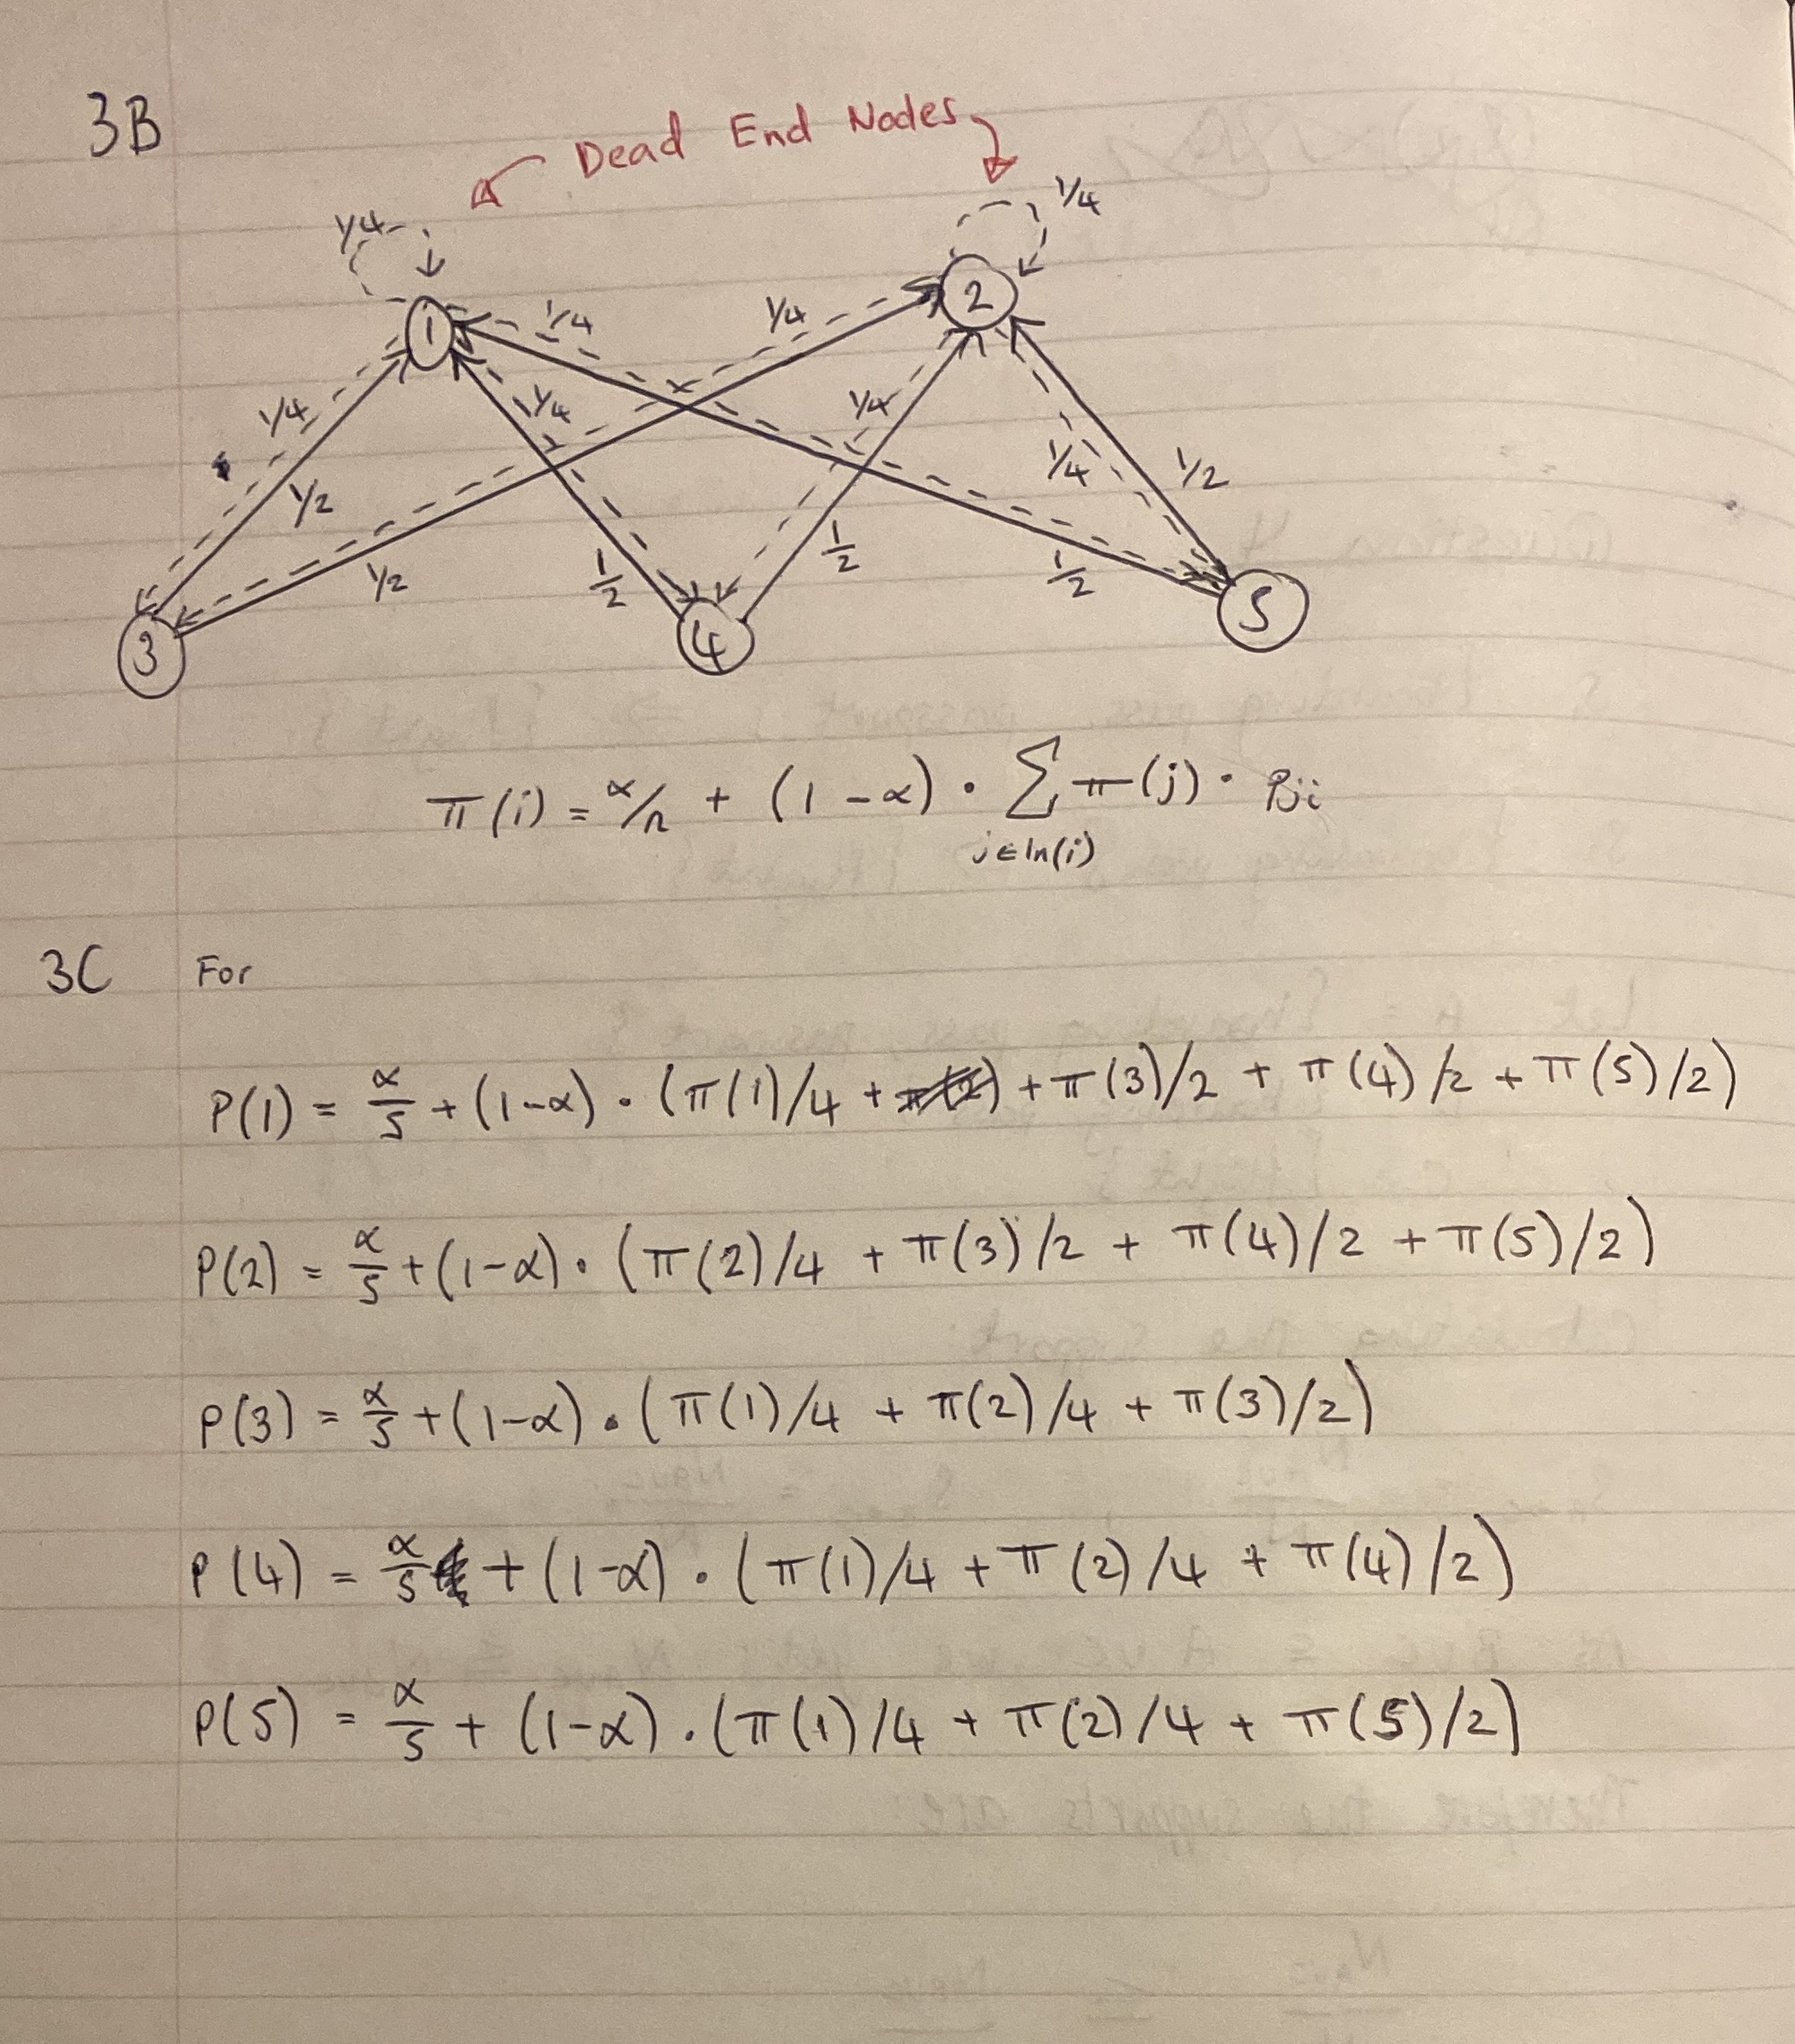

# Part 2

# Question 1a
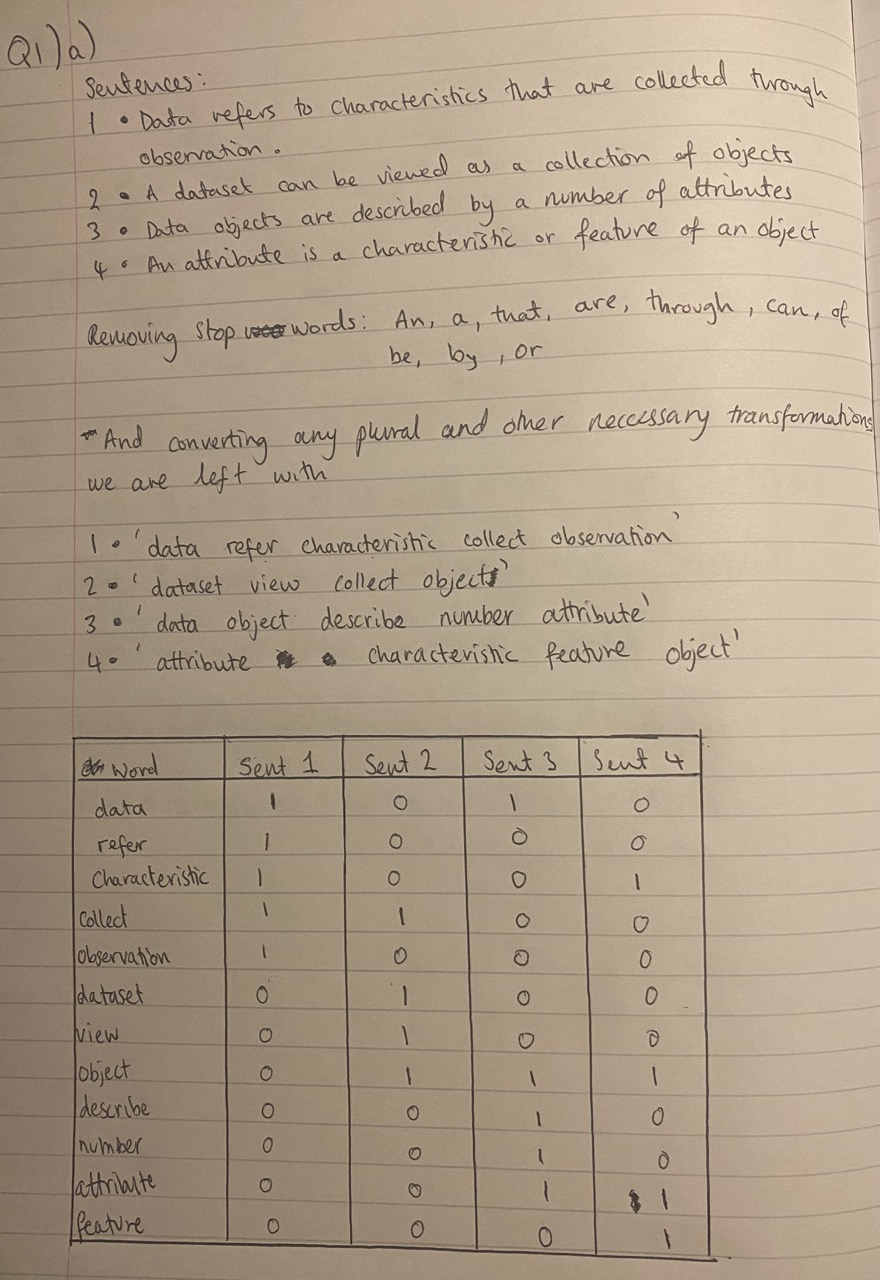

# Question 1b
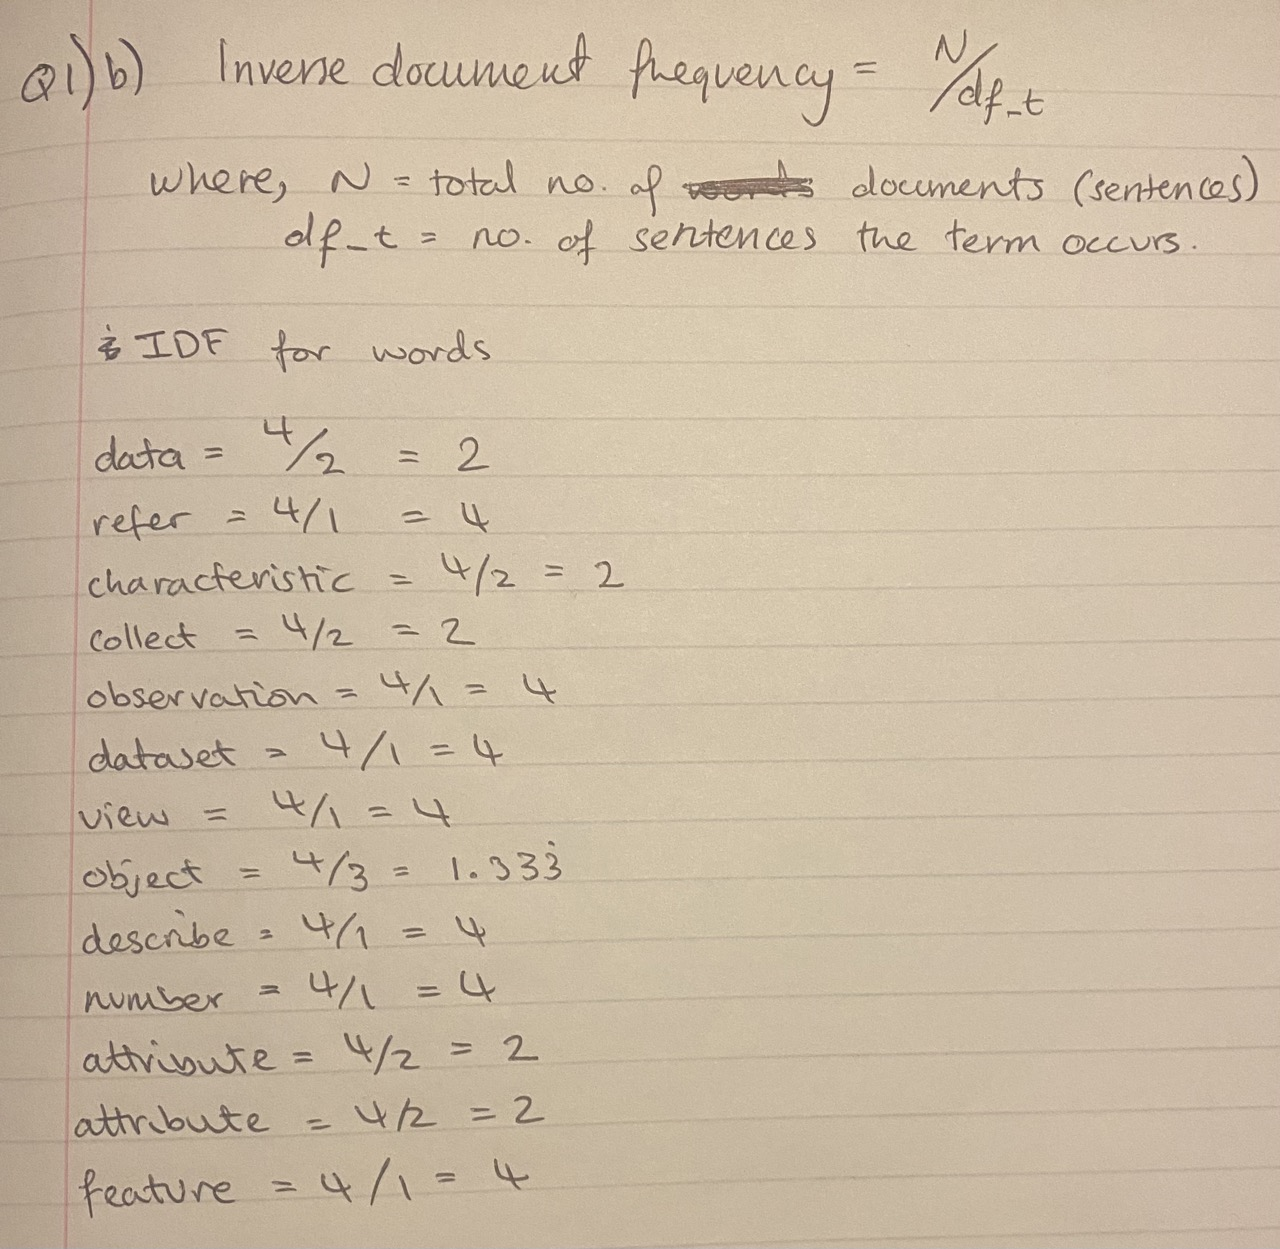

# Question 2

In [23]:
y = [0.1,0.15,0.2,0.2,0.3,0.4,0.25,0.6,0.5]

y = pd.Series(y)

y_rolling = y.rolling(window=3)
y_rolling_mean = y_rolling.mean()
print(y_rolling_mean)

0         NaN
1         NaN
2    0.150000
3    0.183333
4    0.233333
5    0.300000
6    0.316667
7    0.416667
8    0.450000
dtype: float64


# Question 3

In [24]:
# load dataset and immediately put into a numpy array
time_series = read_csv('./Week 11 DATA MINING APPLICATIONS & DATA ETHICS/Supplementary_material_lab09/timeseries.csv', header=None).to_numpy()
# use flatten to turn array into 1D 
time_series_flat = time_series.flatten()
# check
print('Time series shape: ',time_series_flat.shape)

Time series shape:  (1280,)


In [25]:
# perfrom fourier transform
time_ft = np.fft.fft(time_series_flat)
time_ft

array([-6.68277728e-14+0.00000000e+00j,  3.54693035e+01-1.19427187e-13j,
        1.06344555e-13-8.57092175e-14j, ...,
        3.90690183e+01+3.89232065e-15j,  1.06328786e-13+8.81334121e-14j,
        3.54693035e+01+1.18880068e-13j])

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Discrete Fourier Transform of Time Series')

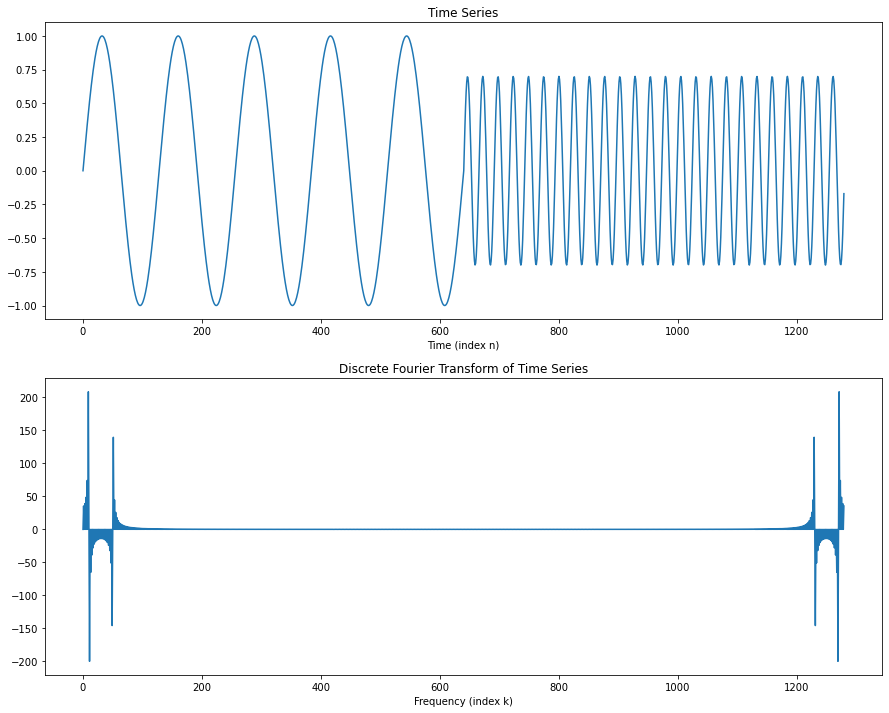

In [26]:
# plotting results
fig,ax=plt.subplots(2,1,figsize=(15,12))

ax[0].plot(time_series)
ax[0].set_xlabel('Time (index n)')
ax[0].set_title('Time Series')


ax[1].plot(time_ft)
ax[1].set_xlabel('Frequency (index k)')
ax[1].set_title('Discrete Fourier Transform of Time Series')



There are 8 predominant frequency components.

# Question 4

<AxesSubplot:title={'center':'Smoothed Timeseries'}, xlabel='Date'>

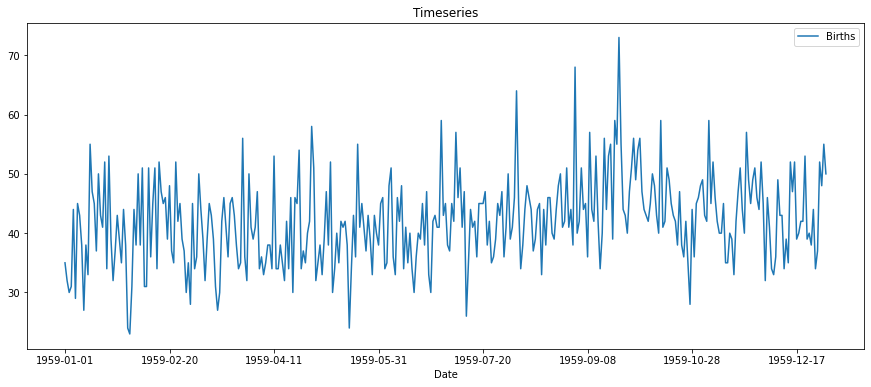

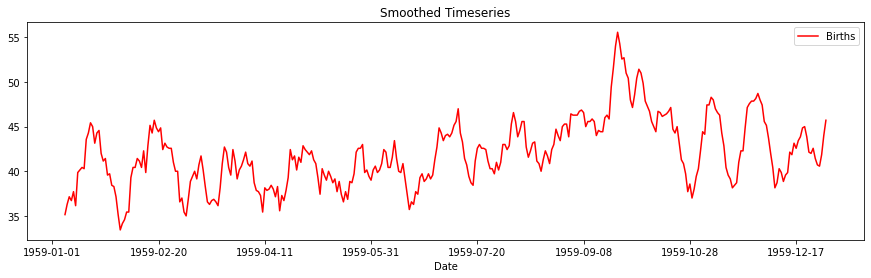

In [27]:
# load data
series = pd.read_csv('./Week 11 DATA MINING APPLICATIONS & DATA ETHICS/Supplementary_material_lab09/births.csv', header=0, index_col=0)
#performing trailing moving average smoothing over 7day window
series_rolling = series.rolling(window=7)
series_rolling_mean = series_rolling.mean()



# plot original and transformed dataset
series.plot(figsize=(15,6),title='Timeseries')
series_rolling_mean.plot(color='red', figsize=(15,4),title='Smoothed Timeseries')

In [28]:
# replacing NaN values with 0
series_rolling_mean.Births = series_rolling_mean.Births.fillna(0)
series_rolling_mean

,Births
Date,
1959-01-01,0.000000
1959-01-02,0.000000
1959-01-03,0.000000
1959-01-04,0.000000
1959-01-05,0.000000
...,...
1959-12-27,40.714286
1959-12-28,40.571429
1959-12-29,41.857143


In [29]:
# import libraries
from statsmodels.tsa.ar_model import AutoReg
# Fit AR model
model = AutoReg(series_rolling_mean, lags=2,old_names=False) # "lags" indicates the model order
model_fit = model.fit()

# Make prediction, to predict the first 5 dats len(data)+5 is used
predictions = model_fit.predict(len(series_rolling_mean), len(series_rolling_mean)+5)
print(predictions)

1960-01-01    45.380177
1960-01-02    44.960852
1960-01-03    44.590676
1960-01-04    44.271699
1960-01-05    43.997395
1960-01-06    43.761548
Freq: D, dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


In [30]:
#import libraries
from statsmodels.tsa.arima.model import ARIMA
from random import random
# Fit ARMA model, p=2, q=2
model_arima = ARIMA(series_rolling_mean, order=(2, 0, 2))
model_arima_fit = model_arima.fit()

# Make prediction, again +5 used for the first 5 days
predictions = model_arima_fit.predict(len(series_rolling_mean), len(series_rolling_mean)+5) # arguments denote which dataset indices to predict
print(predictions)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


1960-01-01    45.810247
1960-01-02    45.818765
1960-01-03    45.728090
1960-01-04    45.564014
1960-01-05    45.347303
1960-01-06    45.094565
Freq: D, Name: predicted_mean, dtype: float64


# Question 5

In [31]:
import wikipedia
# loading articles
articles=['Anomaly detection', 'Cluster analysis', 'k-means clustering', 'Data mining', 'Data warehouse', 'Association rule learning']
wiki_list=[]
title=[]
# loading each article
for article in articles:
    print("loading content: ",article)
    wiki_list.append(wikipedia.page(article,auto_suggest=False).content)
    title.append(article)
print('Complete')

loading content:  Anomaly detection
loading content:  Cluster analysis
loading content:  k-means clustering
loading content:  Data mining
loading content:  Data warehouse
loading content:  Association rule learning
Complete


In [32]:
# import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizing and removing stop words for the articles
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_list) # Create tf-idf feature of the wikipedia dataset

print(X.shape)

(6, 3521)


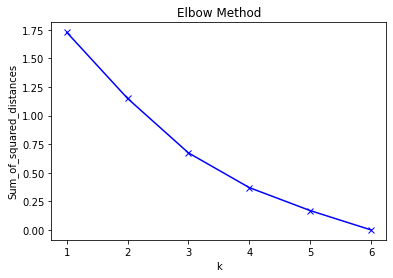

In [33]:
# import libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# create list to record sum of squared distances
Sum_of_squared_distances = []
# range of k values experimented with
K = range(1,7)

# iterating for every value in the K range above
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

# plotting the results of elbow method
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method')
plt.show()

In [34]:
# using k number of clusters as 3 as there is a dent at k=3
model = KMeans(n_clusters=3, init='k-means++', max_iter=200, n_init=10)
model.fit(X)

# Print list of documents and associated clusters
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                       title  cluster
1           Cluster analysis        0
2         k-means clustering        0
5  Association rule learning        0
0          Anomaly detection        1
3                Data mining        2
4             Data warehouse        2
